# Actividad 2 del curso Matemática para la inteligencia artifical

En este notebook se solucionarán los problemas planteados para la Actividad 2 del curso

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 

## 1. Prográmese el método de bisección
Aplíquese para aproximar la solución de las ecuaciones:
- f1: x = cos(x), x en [0,pi/2]
- f2: x^3 + x -1 = 0, x en [0, 1]

Ambas con un error menor que 10^-10

In [2]:
def biseccion(f, a, b, rho=10**-10):
    if f(a)*f(b)>=0:
        if f(a) <= rho:
            return a
        if f(b) <= rho:
            return b
        return f"No solutión in the interval [{a}, {b}]"
    
    xl = a
    xr = b
    
    xm = (xl+xr)/2
    if abs(xr-xl)<2*rho:
        return xm
    
    if f(xl)*f(xm)<0:
        xr = xm
    else:
        xl = xm
    return biseccion(f, xl, xr, rho)


# Función auxiliar para verificar las soluciones de bisección
# de manera gráfica
def plot_function(f, xmin, xmax, num_points=100, plot_zero_line = True):
    # esta función hará un plot de la gráfica de una función
    # xmin: el valor mínimo para la coordenada x
    # xmax: el valor máximo para la coordenada x
    # f: la función a plottear
    # num_points(opcional): la discretización el eje x 
    # plot_zero_line(opcional): dibujar la línea del 0?
    xs = np.linspace(xmin, xmax, num_points)
    fxs = [f(x) for x in xs]
    cero_line = np.zeros(len(xs))
    
    plt.plot(xs, fxs)
    if plot_zero_line:
        plt.plot(xs, cero_line, color="red")
    plt.show()

In [3]:
def f1(x):
    # función cos(x)=x re escrita como cos(x)-x=0
    return math.cos(x)-x

def f2(x):
    return x**3+x-1

### solución a f1: x = cos(x), x en [0,pi/2]
la solución la puede verificar en:
https://www.wolframalpha.com/input/?i=x%3Dcos%28x%29

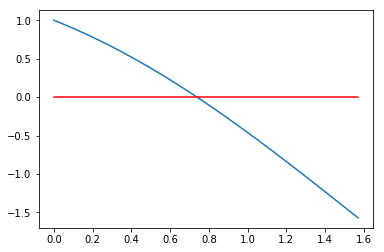

la solución se encontró en x=0.7390851332909909


In [4]:
plot_function(f1, 0, np.pi/2)
solucion1 = biseccion(f1, 0, np.pi/2)
print(f"la solución se encontró en x={solucion1}")

### solución a f2: x^3 + x -1 = 0, x en [0, 1]
La solución la puede verificar en:
https://www.wolframalpha.com/input/?i=x%5E3%2Bx-1%3D0

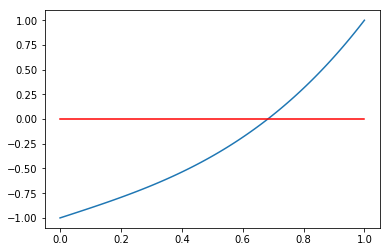

la solución se encontró en x=0.6823278038646095


In [5]:
plot_function(f2, 0, 1)
solucion2 = biseccion(f2, 0, 1)
print(f"la solución se encontró en x={solucion2}")

## 2. Problema del número óptimo de procesadores
Este problema se enuncia en el punto 2 del pdf de la actividad 2.

A continuación se presenta una imagen con la demostración del dejercicio

![title](demostracion_punto2.jpeg)

Según la demostración, 63 es el número óptimo de procesadores a usar. 
¡Grafiquémoslo!


Además encontremos ese máximo de forma numérica creando una malla que va de 1 en 1 y evaluando la función en cada uno de estos puntos

In [6]:
def eficiencia_total(x):
    # Esta función retorna la eficiencia total
    # de un escenario planteado en el ejercicio 2
    return x*(1-0.008*(x-1))

el número óptimo de procesadores es: 63
presentando una eficiencia máxima total de: 31.752


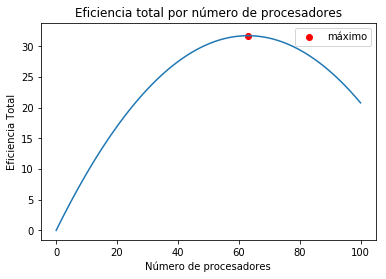

In [7]:
xs = range(0, 101)
effx = [eficiencia_total(x) for x in xs]
max_eff = max(effx)
x_optimo = effx.index(max_eff)
print(f"el número óptimo de procesadores es: {x_optimo}")
print(f"presentando una eficiencia máxima total de: {max_eff}")

plt.plot(xs, effx)
plt.scatter(x_optimo, max_eff, color="red", label="máximo")
plt.ylabel("Eficiencia Total")
plt.xlabel("Número de procesadores")
plt.title("Eficiencia total por número de procesadores")
plt.legend()
plt.show()

## 3. Elabora las siguientes funciones en python
- a) Dados los coeficientes de un polinomio almacenados en un vector, devuelve otro vector con los coeficientes del polinomio resultante de su derivada
- b) Generaliza la funcion anterior para calcular los coeficientes de la derivada de cualquier orden (por tanto el orden de derivación será una entrada adicional de la función)

In [8]:
def derivar_termino(coef, exponente):
    return exponente*coef, exponente-1

def derivar_polinomio(coefs):
    n_max = len(coefs)-1
    coefs_derivados = []
    for i in range(len(coefs)):
        n = n_max-i
        coef = coefs[i]
        new_coef, new_exp = derivar_termino(coef, n)
        if new_exp != -1:
            coefs_derivados.append(new_coef)
    
    # si fue la derivación de una constante, entregue 0
    if len(coefs_derivados)==0:
        coefs_derivados.append(0)
    return coefs_derivados


def derivar_polinomio_n_veces(coefs, orden=1):
    # función que utiliza derivar_polinomio para
    # generar la derivada de orden "orden"
    coefs_deriv= coefs.copy()
    for i in range(orden):
        coefs_deriv = derivar_polinomio(coefs_deriv)
    return coefs_deriv

In [9]:
# Funciones auxiliares para pintar coeficientes
def pintar_termino(coeficiente, exponente):
    if coeficiente == 0:
        return "0"
    
    if exponente == 0:
        return str(coeficiente)
    
    if exponente == 1:
        return f"{coeficiente}x"
    
    return f"{coeficiente}x^{exponente}"

def pintar_polinomio(coefs):
    n_max = len(coefs)-1
    str_polinomio = ""
    for i in range(len(coefs)):
        n = n_max-i
        coef = coefs[i]
        str_termino = pintar_termino(coef, n) 
        
        if str_termino != "0":
            signo = " + " if coef>0 else " "
            if(i==0): signo=""
            str_polinomio += signo+str_termino
    if len(str_polinomio) == 0:
        str_polinomio = "0"
    return str_polinomio

### Probemos las funciones

#### Un Ejemplo
A continuación se comprobará con un ejemplo que las funciones anteriormente definidas funcionan correctamente.

Se utilizará la siguiente función y sus derivadas que fueron previamente calculadas (es fácil que compruebe los resultados:

- f(x)     = 23x^3+ 3x^2 +19x+ 92
- f'(x)    = 69x^2 + 6x + 19
- f''(x)   = 138x+6
- f'''(x)  = 138
- f''''(x) = 0

In [10]:
# los coeficientes de la función mencionada en el texto anterior
coefs = [23, 3, 19, 92]

for i in range(5):
    coefs_derivados = derivar_polinomio_n_veces(coefs, i)
    print("coeficientes de f"+"'"*i+"(x)= "+pintar_polinomio(coefs_derivados))

coeficientes de f(x)= 23x^3 + 3x^2 + 19x + 92
coeficientes de f'(x)= 69x^2 + 6x + 19
coeficientes de f''(x)= 138x + 6
coeficientes de f'''(x)= 138
coeficientes de f''''(x)= 0


Como se puede observar, se calcularon correctamente los coeficientes de las derivadas anteriormente mencionadas

#### ¡Juegue usted mismo!
En esta sección lo invito a que agregue los coeficientes del polinomio que dese y a su vez diga el orden de integración. Se utilizarán las funciones anteriormente definidas para calcular cada una de las derivadas entre la 1 y la del orden que desee.

In [11]:
coefs = [3, 0, 3, 5, 4, 1, 3] # juegue con estos coeficientes
orden_deriv =  9 # también cambie el orden de integración
for i in range(orden_deriv+1):
    coefs_derivados = derivar_polinomio_n_veces(coefs, i)
    print("coeficientes de f"+"'"*i+"(x)= "+pintar_polinomio(coefs_derivados))

coeficientes de f(x)= 3x^6 + 3x^4 + 5x^3 + 4x^2 + 1x + 3
coeficientes de f'(x)= 18x^5 + 12x^3 + 15x^2 + 8x + 1
coeficientes de f''(x)= 90x^4 + 36x^2 + 30x + 8
coeficientes de f'''(x)= 360x^3 + 72x + 30
coeficientes de f''''(x)= 1080x^2 + 72
coeficientes de f'''''(x)= 2160x
coeficientes de f''''''(x)= 2160
coeficientes de f'''''''(x)= 0
coeficientes de f''''''''(x)= 0
coeficientes de f'''''''''(x)= 0


#### Ahora en serio
En esta sección podrá definir el arreglo _**coefs**_ y dar un valor al orden de integración _**orden**_ y obtendra los coeficientes del polinomio luego de aplicar la derivada ese número de veces.

In [12]:
coefs = [23, 0, 0, -92, 28, 21]
orden = 2

coefs_derivados = derivar_polinomio_n_veces(coefs, orden)

print("f(x)= ", pintar_polinomio(coefs))
print()
print("De forma estilizada:")
print("f"+"'"*orden + "(x)=", pintar_polinomio(coefs_derivados))
print()
print("coeficientes derivados:")
print(coefs_derivados)

f(x)=  23x^5 -92x^2 + 28x + 21

De forma estilizada:
f''(x)= 460x^3 -184

coeficientes derivados:
[460, 0, 0, -184]


## Integración numérica

### a) Programar el método del punto medio para aproximar la integral de la siguiente función:
- x*exp(x) entre [0, 1]

Calcúlala con 30, 60, 120 y 240 intervalos y analiza la evolución de los errores

In [56]:
def integracion_medio(f, a, b, n=10):
    h = (b-a)/n
    sumatoria = 0
    for i in range(n):
        actual = f(a+(i+1/2)*h)
        sumatoria+=actual
    return h*sumatoria

In [89]:
intervalos_analisis = [30, 60, 120, 240]
solucion_analitica = 1 # se conoce a priori
soluciones = []
errores = []
for interv in intervalos_analisis:
    sol_actual = integracion_medio(lambda x: x*np.exp(x), 0, 1, interv)
    soluciones.append(sol_actual)
    errores.append(solucion_analitica-sol_actual)

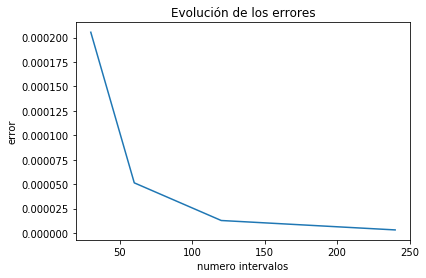

In [90]:
plt.plot(intervalos_analisis, errores)
plt.title("Evolución de los errores")
plt.xlabel("numero intervalos")
plt.ylabel("error")
plt.show()

### b) Implementar la función del trapecio y la regla de simpson 1/3 compuesta
Comparar los errores en los mismos intervalos definidos en el punto anterior

In [121]:
def integracion_trapecio(f, a, b, n=10):
    h = (b-a)/n
    sumatoria = (f(a)+f(b))/2
    
    for i in range(1, n):
        actual = f(a+i*h)
        sumatoria+=actual
    return h*sumatoria

def integracion_regla_simpson(f, a, b, n=10):
    h = (b-a)/6
    solution = h*(f(a)+4*f((a+b)/2)+f(b))
    return solution

def integracion_simpson_1_3_compuesta(f, a, b, n=10):
    h = (b-a)/n
    sumatoria1 = 0
    sumatoria2 = 0
    
    for j in range(1, n//2):
        x2j = a+2*j*h # coordenada x
        sumatoria1 += f(x2j)
        
    for j in range(1, n//2+1):
        x2j_1 = a+(2*j-1)*h
        sumatoria2 += f(x2j_1)
    
    solution = h/3 * (f(a) + 2*sumatoria1 + 4*sumatoria2 + f(b))
    
    return solution

In [122]:
soluciones_trapecio = []
soluciones_simpson = []
soluciones_simpson_1_3 = []
errores_trapecio = []
errores_simpson = []
errores_simpson_1_3 = []


for interv in intervalos_analisis:
    sol_trapecio = integracion_trapecio(lambda x: x*np.exp(x), 0, 1, interv)
    sol_simpson = integracion_regla_simpson(lambda x: x*np.exp(x), 0, 1, interv)
    sol_simpson_1_3 = integracion_simpson_1_3_compuesta(lambda x: x*np.exp(x), 0, 1, interv)
    
    soluciones_trapecio.append(sol_trapecio)
    soluciones_simpson.append(sol_simpson)
    soluciones_simpson_1_3.append(sol_simpson_1_3)
    
    errores_trapecio.append(abs(solucion_analitica-sol_trapecio))
    errores_simpson.append(abs(solucion_analitica-sol_simpson))
    errores_simpson_1_3.append(abs(solucion_analitica-sol_simpson_1_3))

In [123]:
def plot_errors(errores, intervalos, tecnica):
    plt.plot(intervalos, errores, label=f"errores {tecnica}")
    plt.title(f"Evolución errores {tecnica}")
    plt.xlabel("Número de intervalos")
    plt.ylabel("Error")
    plt.show()

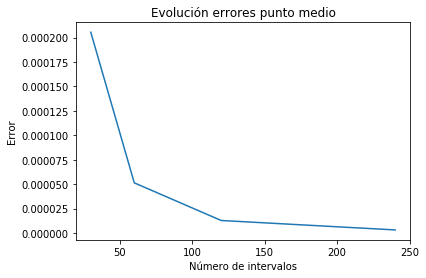

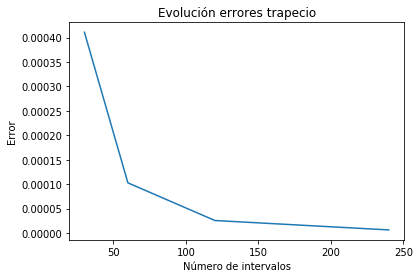

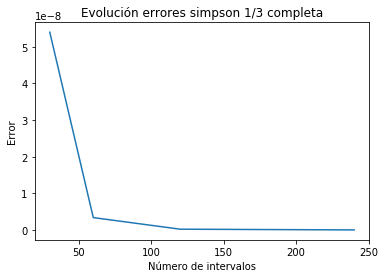

In [124]:
plot_errors(errores, intervalos_analisis, "punto medio")
plot_errors(errores_trapecio, intervalos_analisis, "trapecio")
plot_errors(errores_simpson_1_3, intervalos_analisis, "simpson 1/3 completa")

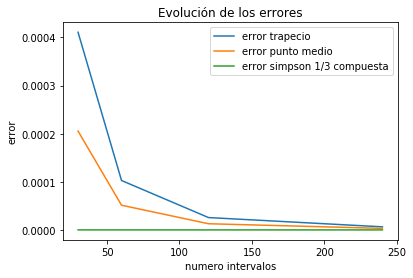

In [127]:
# Comparación de todos los errores a la vez
plt.plot(intervalos_analisis, errores_trapecio, label="error trapecio")
plt.plot(intervalos_analisis, errores, label="error punto medio")
plt.plot(intervalos_analisis, errores_simpson_1_3, label="error simpson 1/3 compuesta")
plt.title("Evolución de los errores")
plt.xlabel("numero intervalos")
plt.ylabel("error")
plt.legend()
plt.show()